In [103]:
# imports

import pandas as pd
import numpy as np


In [104]:
# reading movies data
df = pd.read_csv('./movies.csv', sep=',')

In [105]:
# checking data
df.head(33)


,user_id,title,user_rating,genre,release date
0,1,(500) Days of Summer,1.0,Comedy,2009
1,1,12 Rounds,5.0,Action,2009
2,1,127 Hours,4.0,Adventure,2010
3,1,30 Days of Night,2.0,Horror,2007
4,1,50/50,4.0,Comedy,2011
5,1,88 Minutes,5.0,Drama,2007
6,1,A Serious Man,1.0,Drama,2009
7,1,A Very Harold and Kumar Christmas,3.0,Comedy,2011
8,1,Across the Universe,4.0,Romance,2007
9,1,Adventureland,2.0,Comedy,2009


In [106]:
# get some info about the data set
df.describe()

,user_id,user_rating,release date
count,142.000000,139.000000,142.000000
mean,5.084507,3.000000,2009.161972
std,2.903881,1.302172,1.291749
min,1.000000,1.000000,2007.000000
25%,2.000000,2.000000,2008.000000
50%,5.000000,3.000000,2009.000000
75%,8.000000,4.000000,2010.000000
max,10.000000,5.000000,2011.000000


In [107]:
# get all the mean rating for all titles 
ratings = pd.DataFrame(df.groupby('title')['user_rating'].mean())
ratings.head(33)

,user_rating
title,
(500) Days of Summer,2.285714
"10,000 B.C.",3.000000
12 Rounds,3.000000
127 Hours,3.500000
17 Again,2.600000
27 Dresses,2.500000
30 Days of Night,2.500000
30 Minutes or Less,3.666667
50/50,3.000000


In [108]:
# getting how many times a title has been rated 
ratings['number_of_ratings'] = df.groupby('title')['user_rating'].count()
ratings.head(33)

,user_rating,number_of_ratings
title,,
(500) Days of Summer,2.285714,7
"10,000 B.C.",3.000000,1
12 Rounds,3.000000,5
127 Hours,3.500000,4
17 Again,2.600000,5
27 Dresses,2.500000,2
30 Days of Night,2.500000,4
30 Minutes or Less,3.666667,3
50/50,3.000000,5


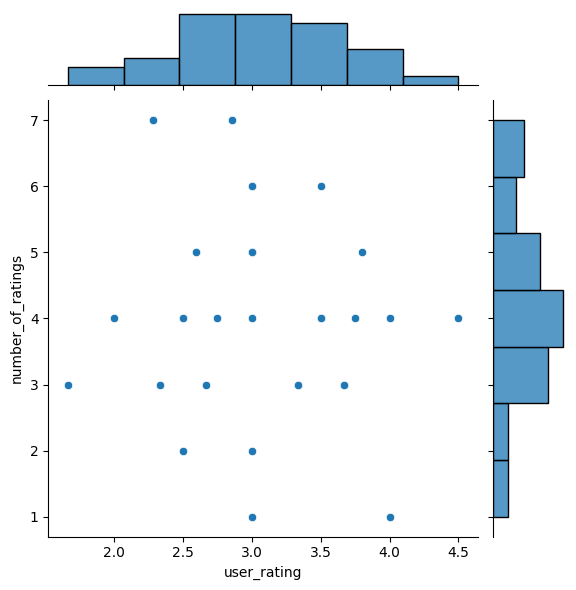

In [109]:
# plotting the joinplot to show the distribution of ratings and most ratring scores
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.jointplot(x = 'user_rating', y = 'number_of_ratings', data = ratings)

In [110]:
# creating the user-time interaction matrix 
# from it we can later create corelations to get our recomendations

data_matrix = df.pivot_table(index='user_id', columns='title', values='user_rating')
data_matrix.head(10)

title,(500) Days of Summer,"10,000 B.C.",12 Rounds,127 Hours,17 Again,27 Dresses,30 Days of Night,30 Minutes or Less,50/50,88 Minutes,...,Amelia,American Gangster,An Education,Anonymous,Apollo 18,Appaloosa,Armored,Arthur,Australia,Avatar
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,5.0,4.0,NaN,NaN,2.0,NaN,4.0,5.0,...,NaN,2.0,1.0,NaN,4.0,NaN,2.0,NaN,3.0,NaN
2,2.0,NaN,1.0,NaN,3.0,NaN,NaN,4.0,NaN,5.0,...,NaN,3.0,2.0,NaN,3.0,NaN,4.0,NaN,2.0,4.0
3,1.0,NaN,NaN,4.0,3.0,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,1.0,NaN
4,3.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN
5,3.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,3.0,NaN,...,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,3.0,NaN
6,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,...,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN
7,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0
8,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,4.0,...,4.0,NaN,2.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN
9,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,3.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0


In [111]:
# most rated movies list
# ratings.sort_values('number_of_ratings', ascending=False).head(10)
ratings.sort_values('user_rating', ascending=False).head(10)

,user_rating,number_of_ratings
title,,
Aliens in the Attic,4.500000,4
Avatar,4.000000,4
Amelia,4.000000,1
Adventureland,3.800000,5
Arthur,3.750000,4
30 Minutes or Less,3.666667,3
A Very Harold and Kumar Christmas,3.666667,3
Abduction,3.500000,4
88 Minutes,3.500000,6


In [112]:
# fetch ratings for first in list (Aliens in the Attic)
# we would like to recommend similar movies to our users that watched it

aliens_user_ratings = data_matrix['Aliens in the Attic']


In [113]:
aliens_user_ratings

user_id
1     4.0
2     4.0
3     NaN
4     5.0
5     5.0
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
Name: Aliens in the Attic, dtype: float64

In [114]:
# find similar movies to (Aliens in the Attic) using correlation with other movies ratings
similar_to_aliens = data_matrix.corrwith(aliens_user_ratings)
similar_to_aliens.head()


d:\--github\_playground\working-with-data\venv\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\--github\_playground\working-with-data\venv\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
(500) Days of Summer     0.904534
10,000 B.C.                   NaN
12 Rounds                0.277350
127 Hours                     NaN
17 Again                -1.000000
dtype: float64

In [115]:
# better display the recommendations
corr_aliens = pd.DataFrame(similar_to_aliens, columns = ['Correlation'])
corr_aliens.dropna(inplace=True)
corr_aliens.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Aliens in the Attic,1.000000
A Nightmare on Elm Street,1.000000
(500) Days of Summer,0.904534
Alice in Wonderland,0.845154
Adventureland,0.500000


In [116]:
# set up to refine the recommendations
corr_aliens = corr_aliens.join(ratings['number_of_ratings'])

corr_aliens.head()

,Correlation,number_of_ratings
title,,
(500) Days of Summer,0.904534,7
12 Rounds,0.277350,5
17 Again,-1.000000,5
50/50,-1.000000,5
A Nightmare on Elm Street,1.000000,3


In [117]:
# applying a filter to refine the recommendations
corr_aliens[corr_aliens['number_of_ratings'] > 3].sort_values(by='Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Aliens in the Attic,1.000000,4
(500) Days of Summer,0.904534,7
Alice in Wonderland,0.845154,7
Adventureland,0.500000,5
An Education,0.500000,7
